In [1]:
import sys
sys.path.insert(0, '../')

from gw_tools import data_prep
from gw_tools import gw_avg_baseline
from gw_tools import gw_plot

import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
wells = ['AEK201', 'AFL259', 'APK309', 'APK310']
def standard_prep(well):
    ## Load cleaned data
    df = data_prep.load_data(well)
    ## Select features for training
    df = data_prep.select_features(df)
    ## Add time of year signal information
    df = data_prep.add_toy_signal(df)
    ## Set aside holdout data for final model validation
    return data_prep.prep_data_for_training(df)

# Baseline Model
For a baseline model, we chose to use the average value of our target variable to predict target values.
## Demonstration
Here, we use this model to make predictcions for each well.

On the holdout set, the predictions made using this model exhibited a root mean squared of 4.390764920637135


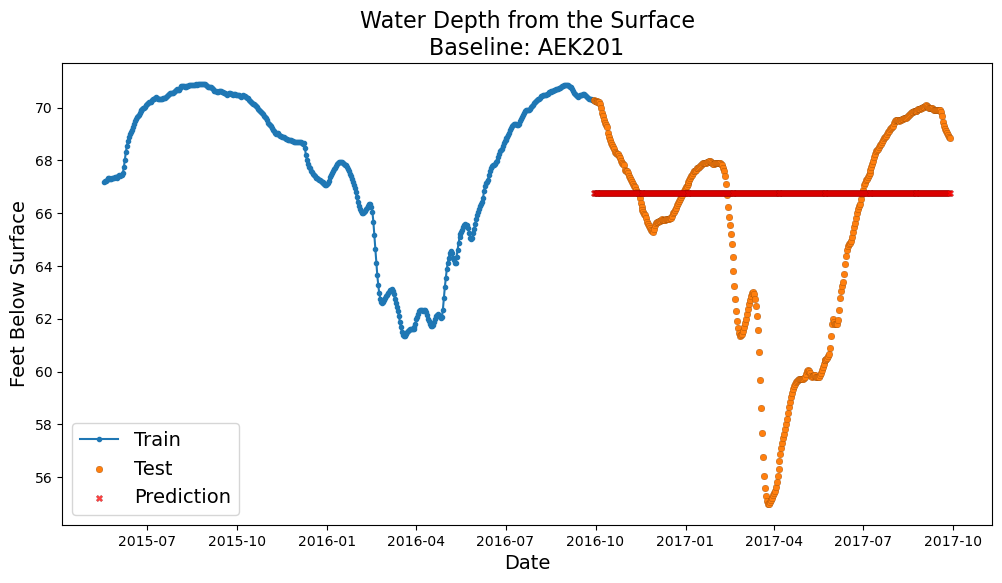

On the holdout set, the predictions made using this model exhibited a root mean squared of 6.896880122551465


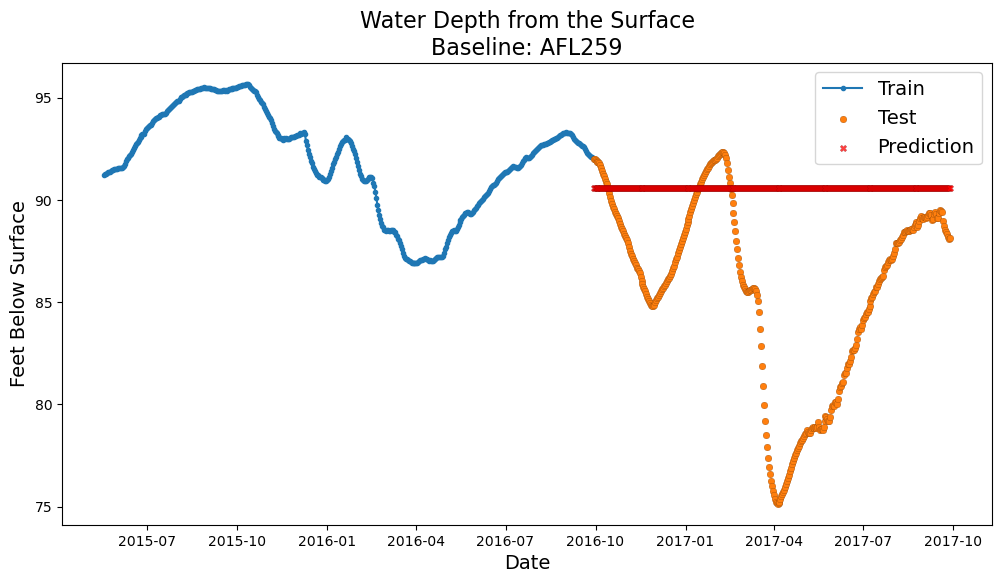

On the holdout set, the predictions made using this model exhibited a root mean squared of 3.205924753505327


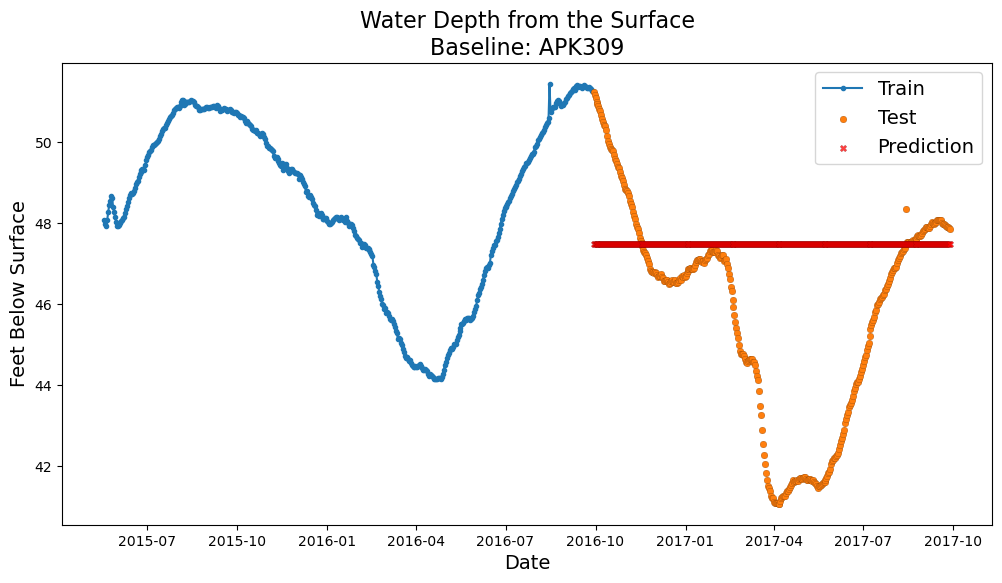

On the holdout set, the predictions made using this model exhibited a root mean squared of 5.060396986475666


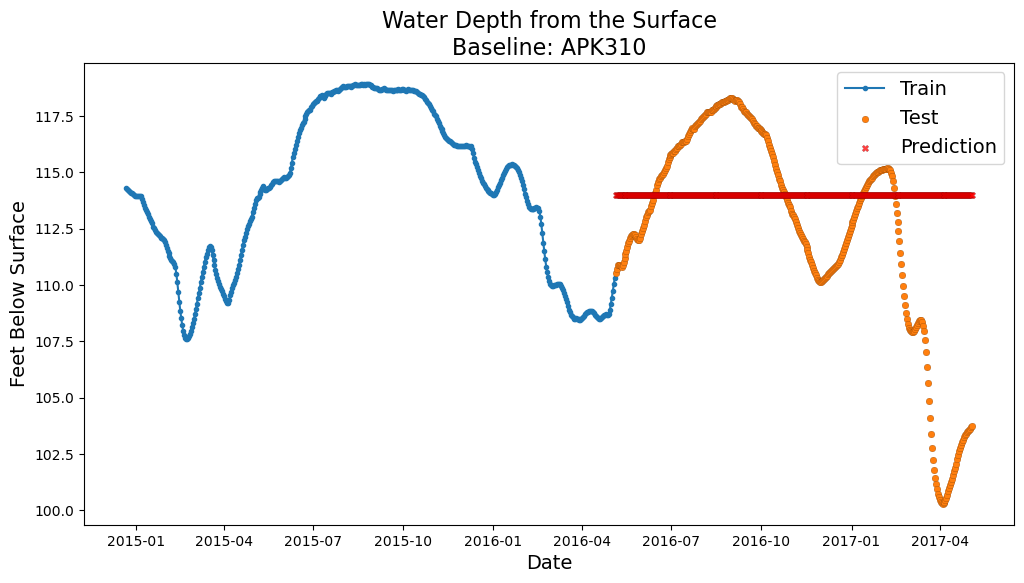

In [3]:
for well in wells:
    ## Prepare the training and holdout data
    X_train, X_holdout, y_train, y_holdout, dt_train, dt_holdout = standard_prep(well)
    ## Instantiate the model
    model_avg  = gw_avg_baseline.gw_mean_predict()
    ## Fit the model
    model_avg.fit(X_train, y_train)
    ## Make predictions
    pred = model_avg.predict(X_holdout, y_holdout)
    ## Compute RMSE
    rmse = np.sqrt(-model_avg.score(X_holdout, y_holdout))
    ## Print results
    print(f'On the holdout set, the predictions made using this model exhibited a root mean squared of {rmse}')
    ## Plot results
    dates = np.append(dt_train, dt_holdout)
    gw_plot.gw_plot(train = y_train, test = y_holdout, pred = pred, dates = dates, train_limit=500, model='Baseline: '+well)